**Dataset Description:** Dataset: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone.

8 numeric + 4 binary + 1 categorical target

| **Feature Name**             | **Type**                             | **Description**                                                                                                                                       |
| ---------------------------- | ------------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------- |
| **age**                      | Numeric (years)                      | The patient’s age in years. Older patients tend to have higher heart failure risk due to weaker cardiac function and cumulative health conditions.    |
| **anaemia**                  | Binary (0 = no, 1 = yes)             | Indicates whether the patient has anaemia — a low red blood cell count that can reduce oxygen delivery to tissues and strain the heart.               |
| **creatinine_phosphokinase** | Numeric (mcg/L)                      | The level of the CPK enzyme in the blood. Elevated levels may indicate muscle damage, including damage to heart tissue.                               |
| **diabetes**                 | Binary (0 = no, 1 = yes)             | Shows whether the patient has diabetes, a chronic condition that increases the risk of cardiovascular disease.                                        |
| **ejection_fraction**        | Numeric (%)                          | The percentage of blood pumped out of the heart with each contraction. Lower values indicate poor heart function and higher mortality risk.           |
| **high_blood_pressure**      | Binary (0 = no, 1 = yes)             | Indicates if the patient has hypertension. Chronic high blood pressure increases strain on the heart and can lead to failure.                         |
| **platelets**                | Numeric (kiloplatelets/mL)           | Platelet count in the blood. Abnormally low or high values can reflect underlying inflammation or blood disorders linked to cardiovascular health.    |
| **serum_creatinine**         | Numeric (mg/dL)                      | Measures kidney function. Elevated levels suggest impaired kidney performance, which often correlates with worse heart failure outcomes.              |
| **serum_sodium**             | Numeric (mEq/L)                      | Sodium concentration in the blood. Low sodium levels (hyponatremia) are common in severe heart failure cases.                                         |
| **sex**                      | Binary (0 = female, 1 = male)        | Biological sex of the patient. Male patients may show higher risk due to hormonal and behavioral factors.                                             |
| **smoking**                  | Binary (0 = no, 1 = yes)             | Indicates whether the patient smokes. Smoking contributes to vascular damage and increases the likelihood of heart failure progression.               |
| **time**                     | Numeric (days)                       | Follow-up period in days. Represents how long the patient was monitored during the study. Shorter times with `DEATH_EVENT = 1` imply early mortality. |
| **DEATH_EVENT**              | Categorical (0 = survived, 1 = died) | Target variable showing whether the patient died during the follow-up period. Used by predictive models to estimate survival outcomes.                |


**DATASET SUMMARY**:

Total samples: 299 patients

Features: 12 clinical features + 1 categorical target (DEATH_EVENT)

Feature types: 8 numeric (e.g., age, ejection_fraction) + 4 binary (e.g., diabetes, anaemia) + 1 categorical target

Target variable: DEATH_EVENT (0 = survived, 1 = died)

Classes: 2 (Survived, Died)

Samples per class: ~231 survived (0), ~68 died (1)

Missing values: In AGE column

Outliers: Minimal — natural variability in clinical measurements

Data quality: Almost clean, small data cleaning required

**Main Goal:** to analyze and predict mortality in heart failure patients using clinical parameters.
The project aims to develop, train, and compare both traditional machine learning and neural network models to identify the most effective approach for predicting survival outcomes and understanding key health risk factors.

**Data Preparation & Exploration:**

- Load and inspect the dataset (check for missing values, duplicates, and data types).

- Visualize feature distributions and relationships with the target (DEATH_EVENT).

- Compute summary statistics and correlation heatmaps to identify the strongest predictors of mortality.

**Model Development:**

1. Traditional ML Model: Implement a baseline model such as Logistic Regression or Decision Tree for interpretability.

2. Neural Network Models:
    - Multilayer Perceptron (MLP): Fully connected neural network for tabular clinical data.

    - Convolutional Neural Network (CNN): Adapted 1D-CNN to learn complex nonlinear relationships among features.

3. Train and test all models using the same data split for fair comparison.

**Evaluation & Analysis:**

1. Evaluate models using Accuracy, Precision, Recall, F1-score, and ROC-AUC metrics.

2. Analyze the impact of tuning key parameters (e.g., learning rate, neurons, regularization strength).

3. Compare model performance and interpret feature importance to identify major clinical risk factors.

**HYPOTHESIS**

1. *Clinical Risk Hypothesis:*
Patients with lower ejection fraction and higher serum creatinine (signs of kidney and heart dysfunction) have a significantly higher risk of death.

2. *Demographic Influence Hypothesis:*
Older patients and those with hypertension or anaemia are more likely to experience fatal outcomes compared to younger, healthier individuals.

3. *Model Performance Hypothesis:*
Traditional ML models (e.g., Logistic Regression, Decision Tree) will perform adequately due to clear clinical thresholds,
but Neural Networks (MLP, CNN) will outperform them slightly by capturing nonlinear relationships among variables.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Excel file
from google.colab import files
uploaded = files.upload()

df = pd.read_excel("heart_failure.xlsx")
df.head()

Saving heart_failure.xlsx to heart_failure.xlsx


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       283 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


(299, 13)

In [ ]:
# check for missing values
df.isnull().sum()

,0
age,16
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [ ]:
df = df.dropna()  # drop these values

In [ ]:
# Check for duplicates
df.duplicated().sum()
df = df.drop_duplicates()

In [ ]:
# Detect and remove outliers
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (212, 13)


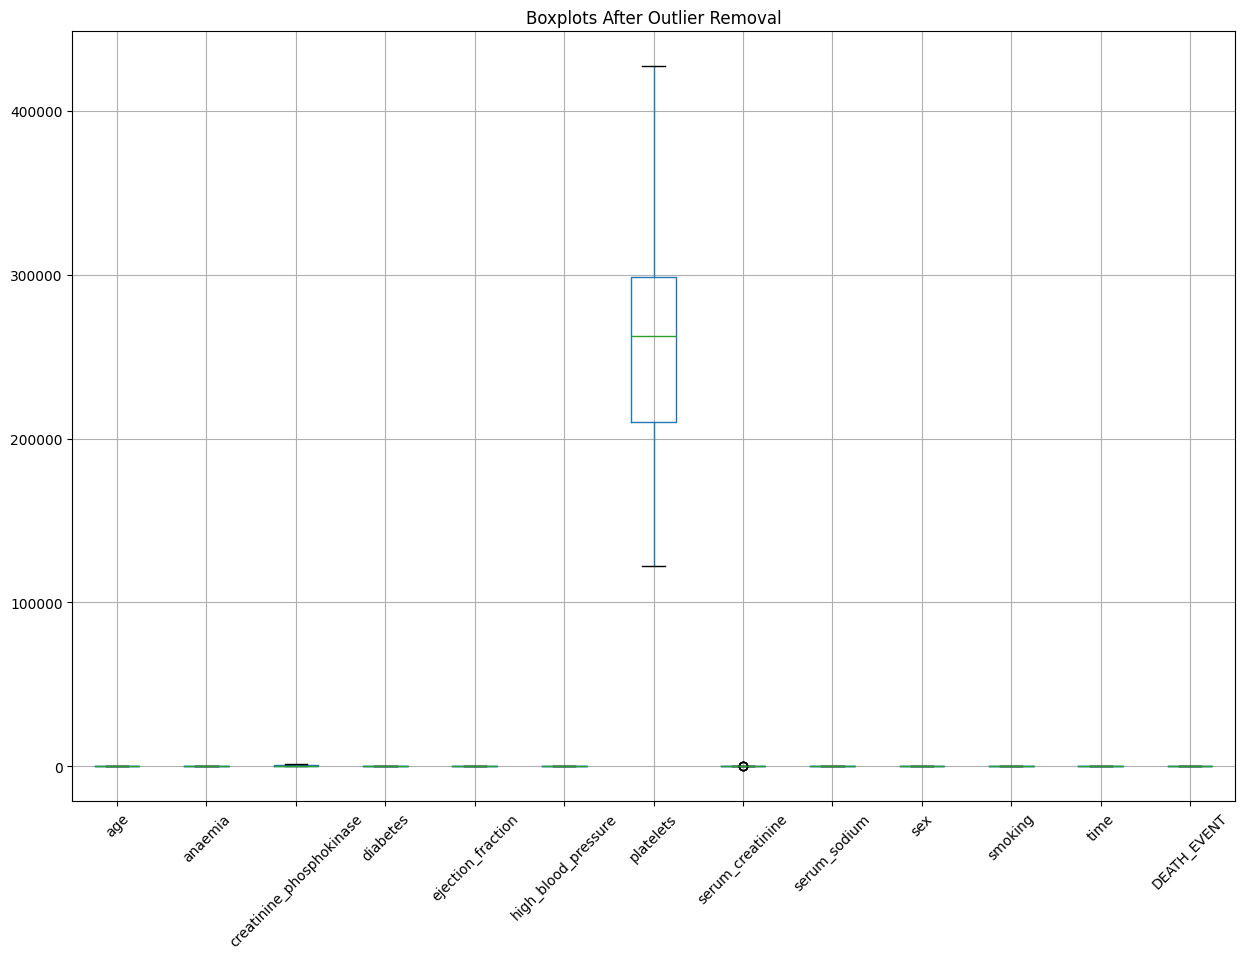

In [ ]:
# Check remaining distribution after outlier removal
plt.figure(figsize=(15, 10))
df.boxplot()
plt.title("Boxplots After Outlier Removal")
plt.xticks(rotation=45)
plt.show()

Outlier removal worked.

*   No extreme values remain far outside whiskers
*   Platelets still has a wide distribution
*   No missing values visible in plot
*   Many biomedical features still show natural clinical variability

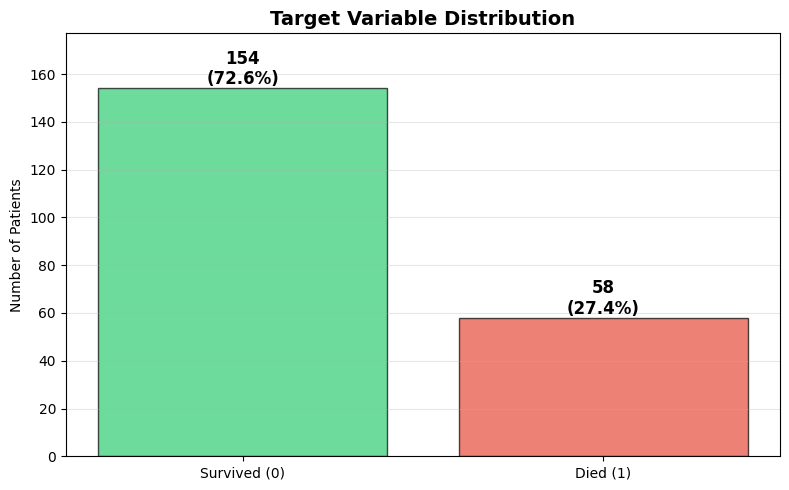

Class Imbalance Ratio: 2.66:1
Minority class (Died): 27.4%


In [ ]:
# Target Death Event check
plt.figure(figsize=(8, 5))
death_counts = df['DEATH_EVENT'].value_counts()
colors = ['#2ecc71', '#e74c3c']

bars = plt.bar(['Survived (0)', 'Died (1)'], death_counts.values, color=colors, alpha=0.7, edgecolor='black')
plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Patients')

for bar, count in zip(bars, death_counts.values):
    percentage = f'{100 * count / len(df):.1f}%'
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'{count}\n({percentage})',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylim(0, max(death_counts.values) * 1.15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Class Imbalance Ratio: {death_counts[0]/death_counts[1]:.2f}:1")
print(f"Minority class (Died): {death_counts[1]/len(df)*100:.1f}%")


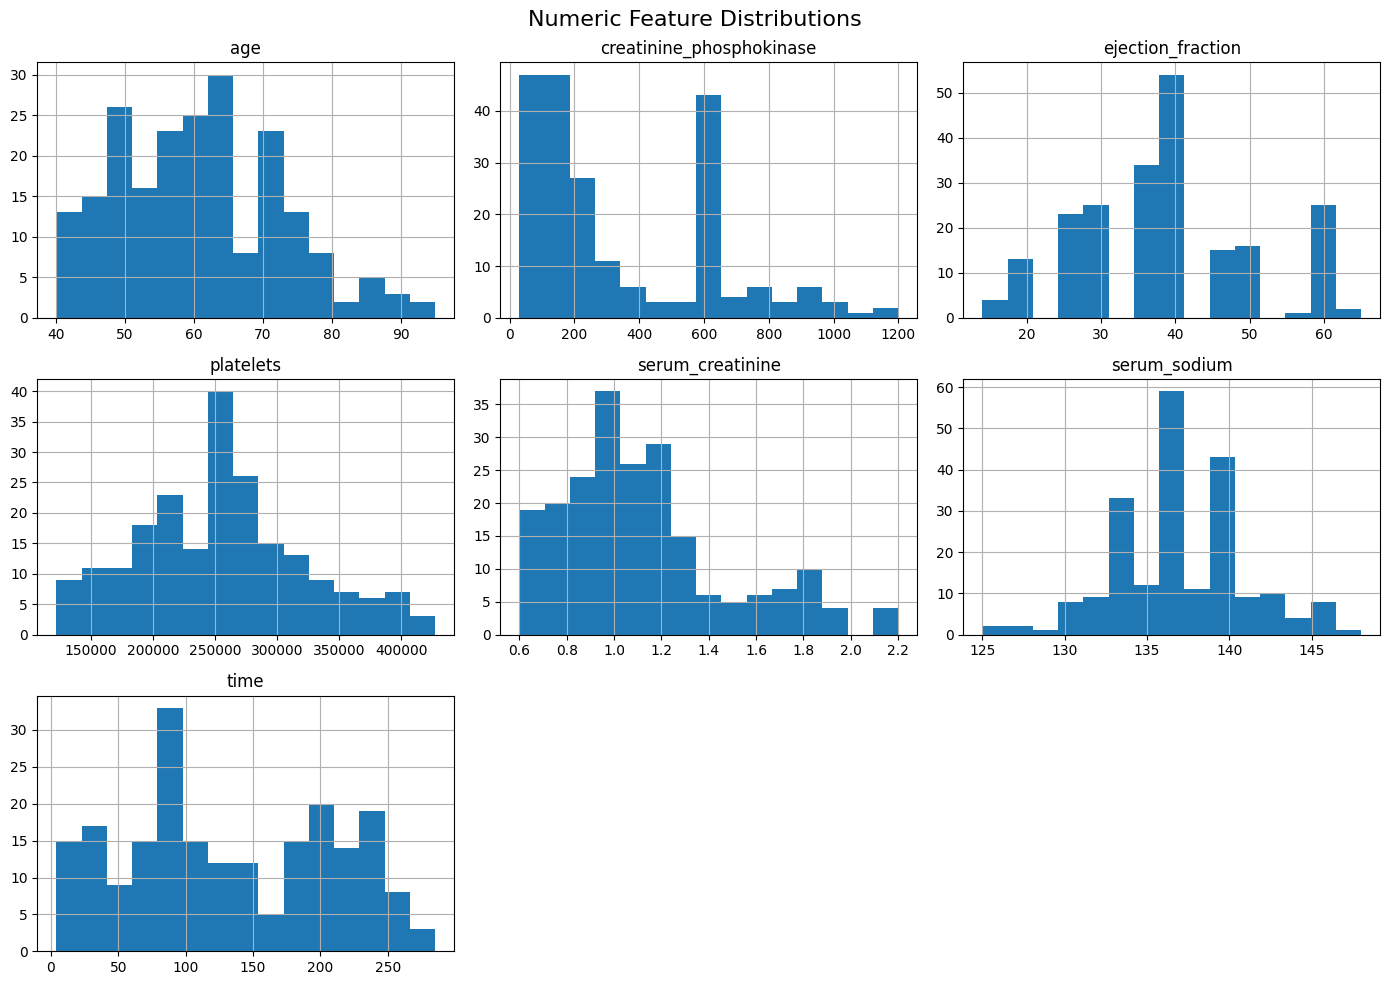

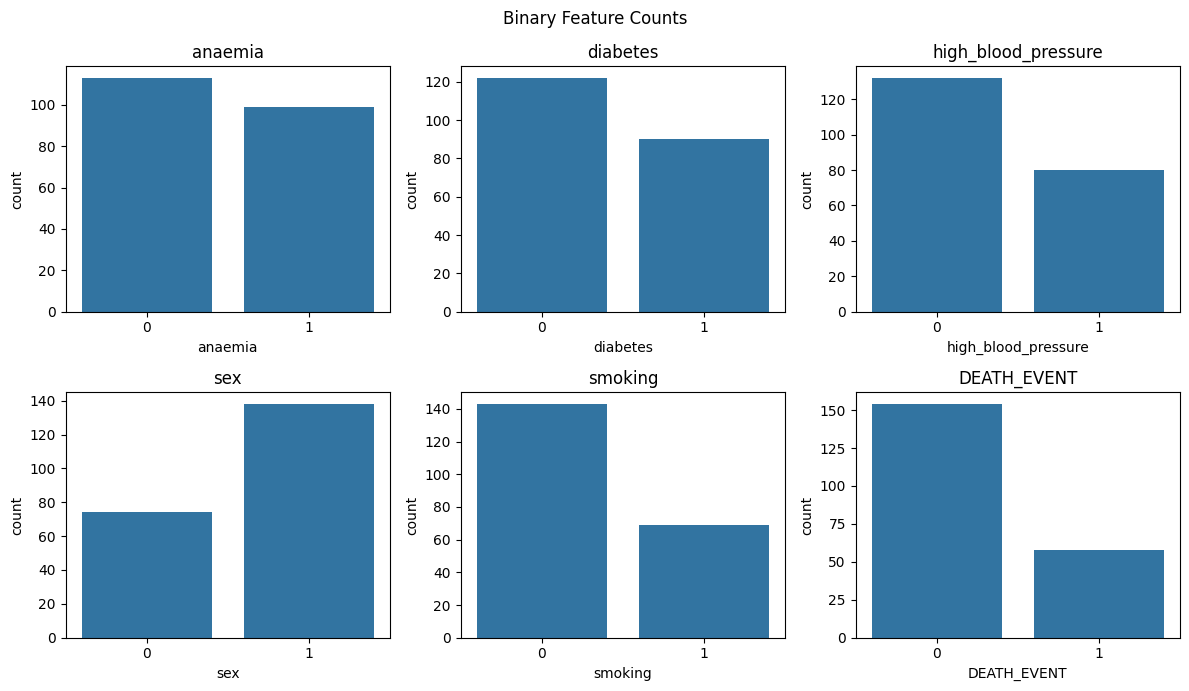

In [ ]:
# Separate Feature Types
binary_cols = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
numeric_cols = [col for col in df.columns if col not in binary_cols]

# 1 Numeric Histograms
df[numeric_cols].hist(bins=15, figsize=(14, 10))
plt.suptitle("Numeric Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# 2️ Binary Feature Count Plots
plt.figure(figsize=(12, 7))
for i, col in enumerate(binary_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col])
    plt.title(col)
plt.suptitle("Binary Feature Counts")
plt.tight_layout()
plt.show()

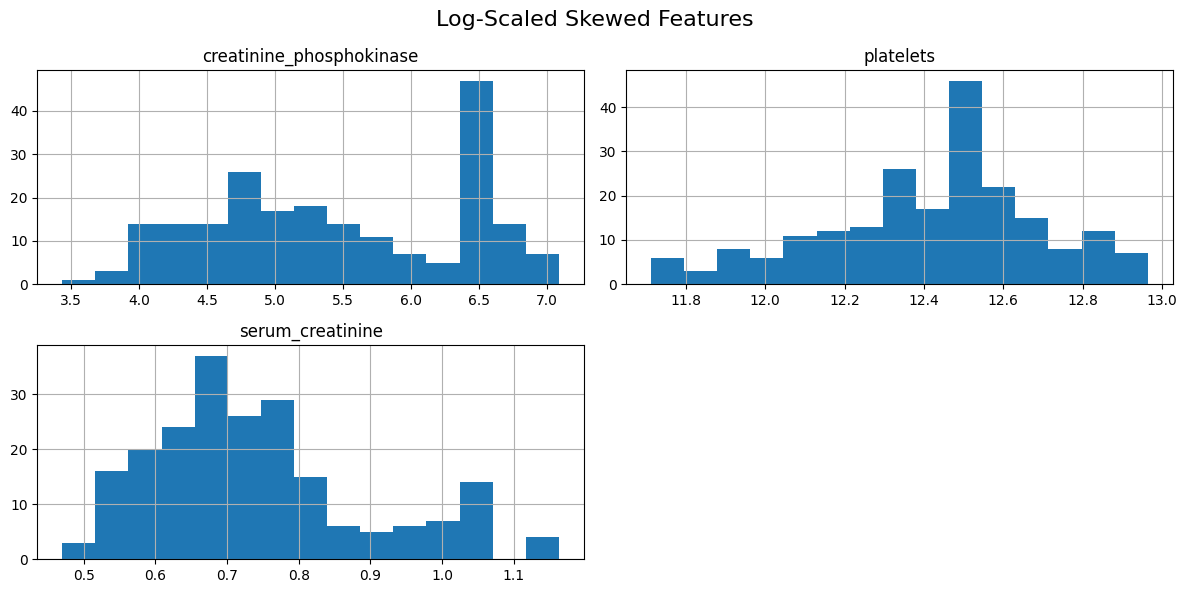

In [ ]:
# 3️ Log-Transformed Skewed Features
# Log-transformed skewed features are data columns with lopsided distributions
# (where most values cluster on one side with a long tail) that have been mathematically adjusted using logarithms.
# Skewed features like income or housing prices can cause problems for machine learning models because extreme values dominate the analysis.
# Applying a log transformation compresses the scale by keeping small values similar while significantly reducing large values, making the data more evenly spread.
# This helps machine learning algorithms work more effectively and makes patterns in the data easier to detect.
skewed_cols = ['creatinine_phosphokinase', 'platelets', 'serum_creatinine']
df_log = df.copy()
for col in skewed_cols:
    df_log[col] = np.log1p(df[col])

df_log[skewed_cols].hist(bins=15, figsize=(12, 6))
plt.suptitle("Log-Scaled Skewed Features", fontsize=16)
plt.tight_layout()
plt.show()

Log transformation was applied to three heavily skewed features: creatinine phosphokinase, platelets, and serum creatinine. After transformation, creatinine phosphokinase (originally 0-1200+) now ranges from 3.5-7.0 and reveals a bimodal distribution with two distinct peaks, suggesting two different patient populations. Platelets transformed from 150,000-400,000 to 11.8-13.0 and became more symmetrically bell-shaped, while serum creatinine changed from 0.6-2.2+ to 0.5-1.1 with a much more normal distribution. This matters because machine learning algorithms like logistic regression, neural networks, and support vector machines perform significantly better with normally-distributed data rather than skewed data. The transformation also prevents extreme outliers from dominating the model's predictions and ensures all features contribute fairly on comparable scales.

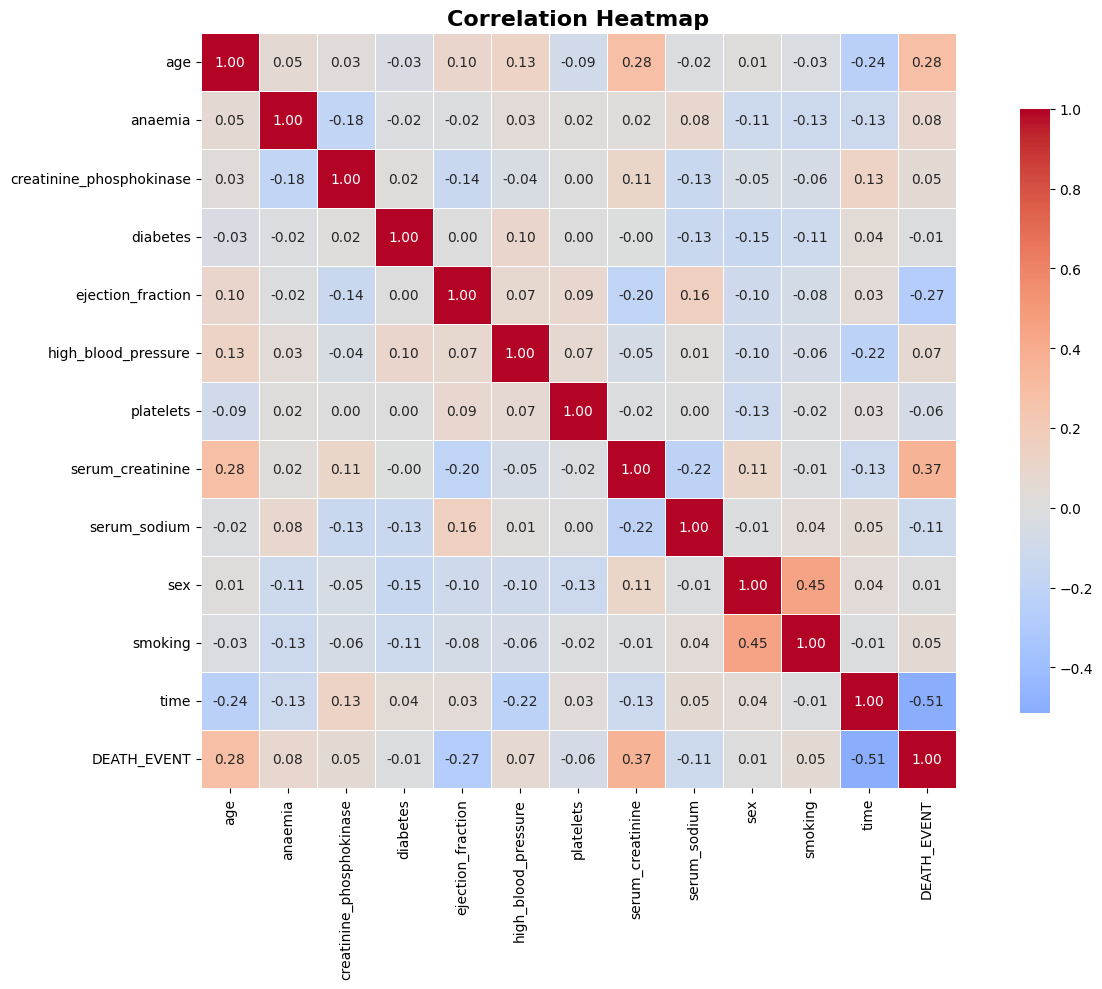

In [ ]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Strong predictors (will be important for the model):

✅ time (-0.51) - the longer the observation period, the lower the probability of death

✅ serum_creatinine (0.37) - the higher, the higher the risk

✅ age (0.28) - the older you are, the higher the risk

✅ ejection_fraction (-0.27) - the higher (better heart function), the lower the risk

Weak predictors (almost no impact):

❌ diabetes, sex, smoking, anemia - very weak association with the target variable

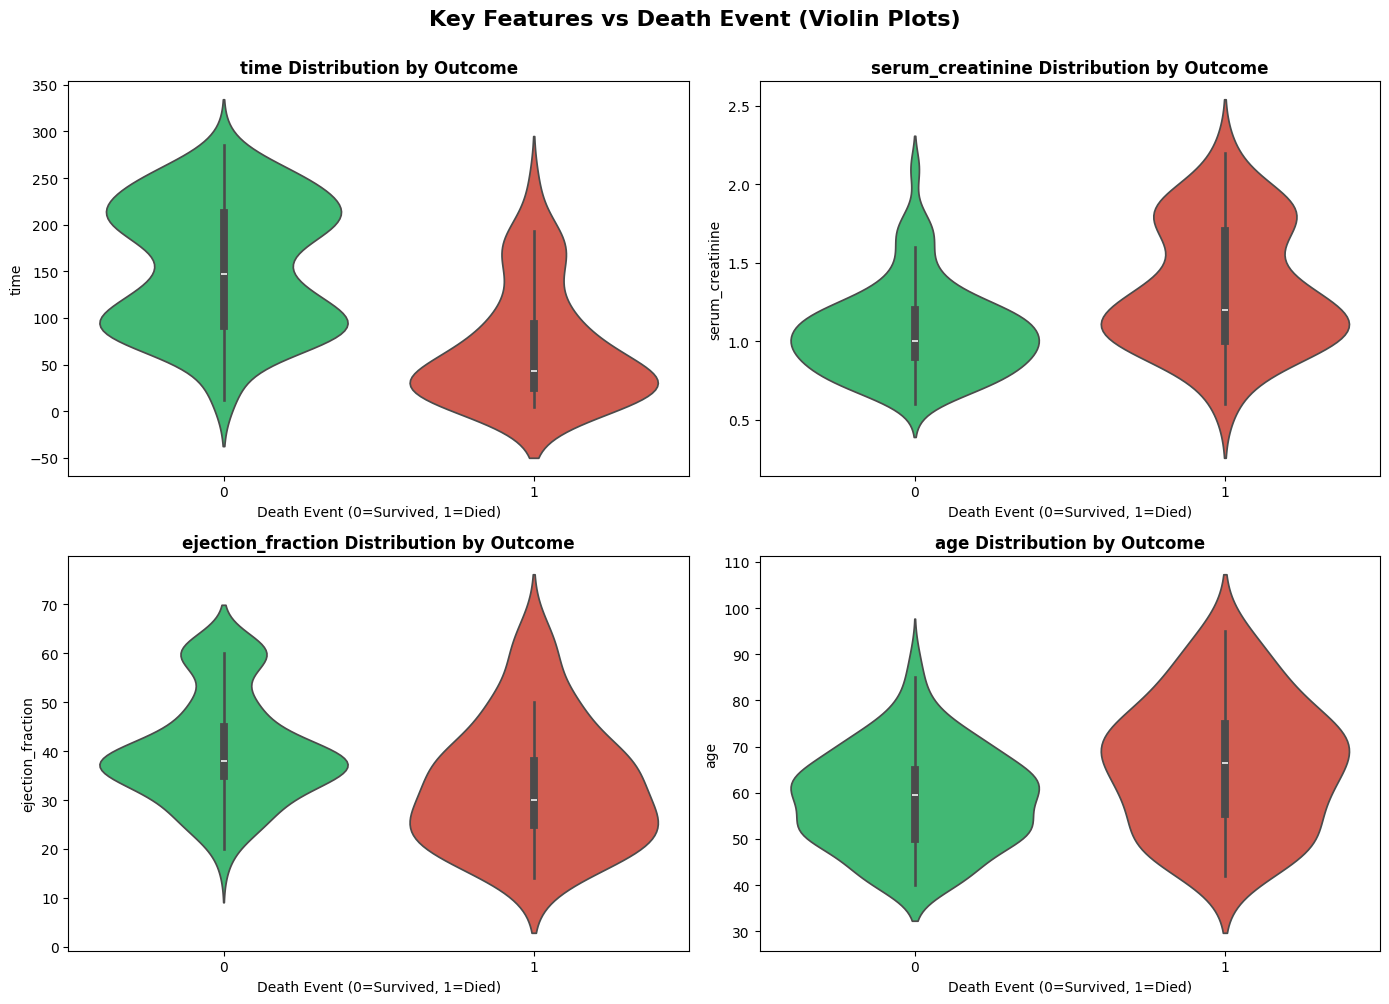

In [ ]:
# Violin plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
important_features = ['time', 'serum_creatinine', 'ejection_fraction', 'age']

for idx, feature in enumerate(important_features):
    ax = axes[idx//2, idx%2]
    sns.violinplot(data=df, x='DEATH_EVENT', y=feature, ax=ax,
                   hue='DEATH_EVENT', palette=['#2ecc71', '#e74c3c'], legend=False)
    ax.set_xlabel('Death Event (0=Survived, 1=Died)')
    ax.set_title(f'{feature} Distribution by Outcome', fontsize=12, fontweight='bold')

plt.suptitle('Key Features vs Death Event (Violin Plots)', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

**TIME**

Conclusion: The most important indicator! The longer a patient is observed, the greater the chance of survival.

**SERUM CREATININE**

Conclusion: High creatinine = bad sign (kidney problems are associated with mortality).

**EJECTION FRACTION**

Conclusion: Low ejection fraction = high risk of death (the heart is pumping blood poorly).

**AGE**

Conclusion: Older age = higher risk, but the difference is not as strong as with other features.

In [ ]:
# DECISION TREE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,                  # Use 20% for testing
    random_state=42,
    stratify=y                      # Maintains same proportion of each class in train/test
)

# Train model
model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,                    # depth limitation to avoid overfitting
    min_samples_split=10,           # At least 10 samples to make a new split
    min_samples_leaf=5,             # At least 5 samples in any leaf node
    class_weight='balanced'         # tells the tree to pay equal attention to both classes, even if one is rarer (like “died”).
)

model.fit(X_train, y_train)

# Predictions (get predicted labels)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Model Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")

Confusion Matrix:
[[29  2]
 [ 6  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        31
           1       0.75      0.50      0.60        12

    accuracy                           0.81        43
   macro avg       0.79      0.72      0.74        43
weighted avg       0.81      0.81      0.80        43


ROC-AUC Score: 0.765


Confusion matrix explanation:

👌 Correct predictions:

29 patients: The model correctly predicted "will survive."
6 patients died, the model correctly predicted "will die."
Total correct: 35 out of 43 (81.4% accuracy)

❌ Failures:

2 patients (False Positive): Survived, but the model predicted "die" Minor problem.
6 patients (False Negative): Died, but the model predicted "survive" CRITICAL! Because recall for died was 0.50, which means the model only finds half of the deceased patients!

In [ ]:
# Let's try again the Decision Tree, but with more depth.

model = DecisionTreeClassifier(
    random_state=42,
    max_depth=8, # increased to 8
    min_samples_split=5,  # Was 10
    min_samples_leaf=3,   # Was 5
    class_weight='balanced'
)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")

# ========================================
# ADDITIONAL METRICS FOR COMPARISON TABLE
# ========================================

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
precision_died = precision_score(y_test, y_pred)
recall_died = recall_score(y_test, y_pred)
f1_died = f1_score(y_test, y_pred)

print("\n" + "="*50)
print("📊 SUMMARY METRICS")
print("="*50)
print(f"Train Accuracy:    {train_accuracy:.3f}")
print(f"Test Accuracy:     {test_accuracy:.3f}")
print(f"Overfitting:       {train_accuracy - test_accuracy:.3f}")
print(f"Precision (Died):  {precision_died:.3f}")
print(f"Recall (Died):     {recall_died:.3f}")
print(f"F1-Score (Died):   {f1_died:.3f}")
print("="*50)


Confusion Matrix:
[[29  2]
 [ 5  7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        31
           1       0.78      0.58      0.67        12

    accuracy                           0.84        43
   macro avg       0.82      0.76      0.78        43
weighted avg       0.83      0.84      0.83        43


ROC-AUC Score: 0.746

📊 SUMMARY METRICS
Train Accuracy:    0.929
Test Accuracy:     0.837
Overfitting:       0.092
Precision (Died):  0.778
Recall (Died):     0.583
F1-Score (Died):   0.667


RESULTS:

Correct predictions: 36/43 (83.7% accuracy)
- Survived → Survived: 29
- Died → Died: 7

Errors: 7/43
- Survived → Died: 2 (False Positive)
- Died → Survived: 5 (False Negative - still there is a problem)

In [ ]:
# Let's try the Random Forest also.

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,                   # sets the number of trees in your
                                        # random forest to 100. More trees can
                                        # improve performance and stability by averaging many predictions.
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    # means the computer will always make the same random choices each time you
    # run the code, so you get the same results whenever you repeat your experiment.
    random_state=42
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability for positive class

# Results
print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
print(f"\nRandom Forest - ROC-AUC Score: {roc_auc:.3f}")

# ========================================
# ADDITIONAL METRICS FOR COMPARISON TABLE
# ========================================

train_accuracy_rf = rf_model.score(X_train, y_train)
test_accuracy_rf = rf_model.score(X_test, y_test)
precision_died_rf = precision_score(y_test, y_pred_rf)
recall_died_rf = recall_score(y_test, y_pred_rf)
f1_died_rf = f1_score(y_test, y_pred_rf)

print("\n" + "="*50)
print("📊 SUMMARY METRICS - RANDOM FOREST")
print("="*50)
print(f"Train Accuracy:    {train_accuracy_rf:.3f}")
print(f"Test Accuracy:     {test_accuracy_rf:.3f}")
print(f"Overfitting:       {train_accuracy_rf - test_accuracy_rf:.3f}")
print(f"Precision (Died):  {precision_died_rf:.3f}")
print(f"Recall (Died):     {recall_died_rf:.3f}")
print(f"F1-Score (Died):   {f1_died_rf:.3f}")
print("="*50)

Random Forest - Confusion Matrix:
[[29  2]
 [ 6  6]]

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        31
           1       0.75      0.50      0.60        12

    accuracy                           0.81        43
   macro avg       0.79      0.72      0.74        43
weighted avg       0.81      0.81      0.80        43


Random Forest - ROC-AUC Score: 0.798

📊 SUMMARY METRICS - RANDOM FOREST
Train Accuracy:    0.988
Test Accuracy:     0.814
Overfitting:       0.174
Precision (Died):  0.750
Recall (Died):     0.500
F1-Score (Died):   0.600


| Model                     | True Positive | False Negative | Recall (died) |
|---------------------------|---------------|----------------|---------------|
| Decision Tree (depth=5)   | 6             | 6              | 50%           |
| Decision Tree (depth=8)   | 7             | 5              | 58.3%         |
| Random Forest             | 6             | 6              | 50%           |

Decision Tree with depth=8 turned out to be better than Random Forest.
Why?

1.   Random Forest is too conservative with these parameters.
2.   Small dataset (212 samples) - Random Forest doesn't always help.
3.   A single deep tree sometimes works better on small data.

**MULTILAYER PERCEPTRON (MLP)**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# MLP requires normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP learning
mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # 2 hidden layers
    activation='relu',
    max_iter=1000,
    random_state=42
)

mlp_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_mlp = mlp_model.predict(X_test_scaled)
y_pred_proba_mlp = mlp_model.predict_proba(X_test_scaled)[:, 1]

# Results
print("MLP - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))

print("\nMLP - Classification Report:")
print(classification_report(y_test, y_pred_mlp))

print(f"\nMLP - ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_mlp):.3f}")

# Additional metrics
train_accuracy_mlp = mlp_model.score(X_train_scaled, y_train)
test_accuracy_mlp = mlp_model.score(X_test_scaled, y_test)
precision_died_mlp = precision_score(y_test, y_pred_mlp)
recall_died_mlp = recall_score(y_test, y_pred_mlp)
f1_died_mlp = f1_score(y_test, y_pred_mlp)

print("\n" + "="*50)
print("📊 SUMMARY METRICS - MLP")
print("="*50)
print(f"Train Accuracy:    {train_accuracy_mlp:.3f}")
print(f"Test Accuracy:     {test_accuracy_mlp:.3f}")
print(f"Overfitting:       {train_accuracy_mlp - test_accuracy_mlp:.3f}")
print(f"Precision (Died):  {precision_died_mlp:.3f}")
print(f"Recall (Died):     {recall_died_mlp:.3f}")
print(f"F1-Score (Died):   {f1_died_mlp:.3f}")
print("="*50)

MLP - Confusion Matrix:
[[29  2]
 [10  2]]

MLP - Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        31
           1       0.50      0.17      0.25        12

    accuracy                           0.72        43
   macro avg       0.62      0.55      0.54        43
weighted avg       0.68      0.72      0.67        43


MLP - ROC-AUC Score: 0.728

📊 SUMMARY METRICS - MLP
Train Accuracy:    1.000
Test Accuracy:     0.721
Overfitting:       0.279
Precision (Died):  0.500
Recall (Died):     0.167
F1-Score (Died):   0.250


**AUTOENCODER**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    accuracy_score, precision_score, recall_score, f1_score
)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# ========================================
# DATA NORMALIZATION
# ========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========================================
# AUTOENCODER FOR FEATURE COMPRESSION
# ========================================
input_dim = X_train_scaled.shape[1]  # Number of features
encoding_dim = 6  # Compress to 6 features

# Build Autoencoder
input_layer = keras.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_layer, decoded)
encoder = keras.Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse')

# Train Autoencoder (compress features)
print("Training Autoencoder...")
autoencoder.fit(
    X_train_scaled, X_train_scaled,
    epochs=50,
    batch_size=16,
    shuffle=True,
    validation_split=0.1,
    verbose=0
)
print("Autoencoder trained!")

# Get compressed features
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

print(f"\nOriginal features: {X_train_scaled.shape[1]}")
print(f"Encoded features:  {X_train_encoded.shape[1]}")

# ========================================
# CLASSIFIER ON COMPRESSED FEATURES
# ========================================
ae_classifier = MLPClassifier(
    hidden_layer_sizes=(32,),
    activation='relu',
    max_iter=1000,
    random_state=42
)

ae_classifier.fit(X_train_encoded, y_train)

# Predictions
y_pred_ae = ae_classifier.predict(X_test_encoded)
y_pred_proba_ae = ae_classifier.predict_proba(X_test_encoded)[:, 1]

# Results
print("\n" + "="*50)
print("AUTOENCODER + CLASSIFIER - Results")
print("="*50)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_ae))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ae))

print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_ae):.3f}")

# Additional metrics
train_accuracy_ae = ae_classifier.score(X_train_encoded, y_train)
test_accuracy_ae = ae_classifier.score(X_test_encoded, y_test)
precision_died_ae = precision_score(y_test, y_pred_ae)
recall_died_ae = recall_score(y_test, y_pred_ae)
f1_died_ae = f1_score(y_test, y_pred_ae)

print("\n" + "="*50)
print("📊 SUMMARY METRICS - AUTOENCODER + CLASSIFIER")
print("="*50)
print(f"Train Accuracy:    {train_accuracy_ae:.3f}")
print(f"Test Accuracy:     {test_accuracy_ae:.3f}")
print(f"Overfitting:       {train_accuracy_ae - test_accuracy_ae:.3f}")
print(f"Precision (Died):  {precision_died_ae:.3f}")
print(f"Recall (Died):     {recall_died_ae:.3f}")
print(f"F1-Score (Died):   {f1_died_ae:.3f}")
print("="*50)


Training Autoencoder...
✅ Autoencoder trained!
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Original features: 12
Encoded features:  6

AUTOENCODER + CLASSIFIER - Results

Confusion Matrix:
[[30  1]
 [10  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.97      0.85        31
           1       0.67      0.17      0.27        12

    accuracy                           0.74        43
   macro avg       0.71      0.57      0.56        43
weighted avg       0.73      0.74      0.68        43


ROC-AUC Score: 0.669

📊 SUMMARY METRICS - AUTOENCODER + CLASSIFIER
Train Accuracy:    0.817
Test Accuracy:     0.744
Overfitting:       0.072
Precision (Died):  0.667
Recall (Died):     0.167
F1-Score (Died):   0.267


| Model                     | Train Accuracy | Test Accuracy | Overfitting | Precision (Died) | Recall (Died) | F1 Score (Died) | ROC-AUC | True Positives | False Negatives |
|--------------------------|----------------|---------------|-------------|------------------|----------------|-----------------|---------|----------------|------------------|
| Decision Tree (depth=8)  | 0.929          | 0.837         | 0.092       | 0.778            | 0.583          | 0.667           | 0.746   | 7              | 5                |
| Random Forest            | 0.988          | 0.814         | 0.174       | 0.750            | 0.500          | 0.600           | 0.798   | 6              | 6                |
| MLP                      | 1.000          | 0.721         | 0.279       | 0.500            | 0.167          | 0.250           | 0.728   | 2              | 10               |
| Autoencoder              | 0.817          | 0.744         | 0.072       | 0.667            | 0.167          | 0.267           | 0.669   | 2              | 10               |


**THE CONCLUSIONS**

This table shows how well each model predicts whether a person **will die or survive**. The most important columns are **Recall (Died)** and **True Positives**, because they show how many real death cases the model correctly finds. The **Decision Tree** performed the best overall — it correctly predicted **7 patients who died** and missed only 5, which means it detects risk better than the others. The **Random Forest** is good at separating classes (high ROC-AUC), but it still misses half of the death cases, which is not ideal in a medical setting. The **MLP** and **Autoencoder** models are overfitting — they look perfect on the training data but perform poorly on real, unseen data and fail to detect most deaths (only 2 correctly).

In simple terms: **The Decision Tree model is the most reliable and useful here**, because it correctly identifies more patients who are in danger, while the other models miss too many critical cases.


***ADDITIONAL TESTS/TRIES***

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ========================================
# IMPROVED MLP with Regularization
# ========================================

mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    alpha=0.01,
    batch_size=16,
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=500,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=20,
    random_state=42,
    verbose=False
)

print("\nTraining Improved MLP...")
mlp_model.fit(X_train_scaled, y_train)
print(f"✅ Training stopped at iteration: {mlp_model.n_iter_}")

# Predictions
y_pred_mlp = mlp_model.predict(X_test_scaled)
y_pred_proba_mlp = mlp_model.predict_proba(X_test_scaled)[:, 1]

# Results
print("\nImproved MLP - Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_mlp)
print(cm)

print("\nImproved MLP - Classification Report:")
print(classification_report(y_test, y_pred_mlp))

print(f"\nImproved MLP - ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_mlp):.3f}")

# Additional metrics
train_accuracy_mlp = mlp_model.score(X_train_scaled, y_train)
test_accuracy_mlp = mlp_model.score(X_test_scaled, y_test)
precision_died_mlp = precision_score(y_test, y_pred_mlp)
recall_died_mlp = recall_score(y_test, y_pred_mlp)
f1_died_mlp = f1_score(y_test, y_pred_mlp)

print("\n" + "="*50)
print("📊 SUMMARY METRICS - IMPROVED MLP")
print("="*50)
print(f"Train Accuracy:    {train_accuracy_mlp:.3f}")
print(f"Test Accuracy:     {test_accuracy_mlp:.3f}")
print(f"Overfitting:       {train_accuracy_mlp - test_accuracy_mlp:.3f}")
print(f"Precision (Died):  {precision_died_mlp:.3f}")
print(f"Recall (Died):     {recall_died_mlp:.3f}")
print(f"F1-Score (Died):   {f1_died_mlp:.3f}")
print(f"True Positives:    {cm[1,1]}")
print(f"False Negatives:   {cm[1,0]}")
print("="*50)

X_train shape: (169, 12)
X_test shape: (43, 12)
y_train shape: (169,)
y_test shape: (43,)

Training Improved MLP...
✅ Training stopped at iteration: 33

Improved MLP - Confusion Matrix:
[[29  2]
 [ 7  5]]

Improved MLP - Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        31
           1       0.71      0.42      0.53        12

    accuracy                           0.79        43
   macro avg       0.76      0.68      0.70        43
weighted avg       0.78      0.79      0.77        43


Improved MLP - ROC-AUC Score: 0.777

📊 SUMMARY METRICS - IMPROVED MLP
Train Accuracy:    0.882
Test Accuracy:     0.791
Overfitting:       0.091
Precision (Died):  0.714
Recall (Died):     0.417
F1-Score (Died):   0.526
True Positives:    5
False Negatives:   7


The Improved MLP shows better generalization compared to the original MLP, increasing test accuracy from 0.721 to 0.791 while significantly reducing overfitting. It also greatly improved precision for predicting deaths, meaning when it predicts a patient will die, it is correct most of the time. However, the recall for deaths remains relatively low, so it still misses many actual death cases. Overall, the model is now more balanced and performs closer to the Decision Tree, though the Decision Tree still detects more true death cases. The Improved MLP also achieves a strong ROC-AUC score, showing good ability to rank patients by risk. In summary, the Improved MLP is more reliable than the previous version, but the Decision Tree remains the best model for correctly identifying patients who are likely to die.